In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload 
%autoreload 2

import scipy.stats
import numpy as np
import inla

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


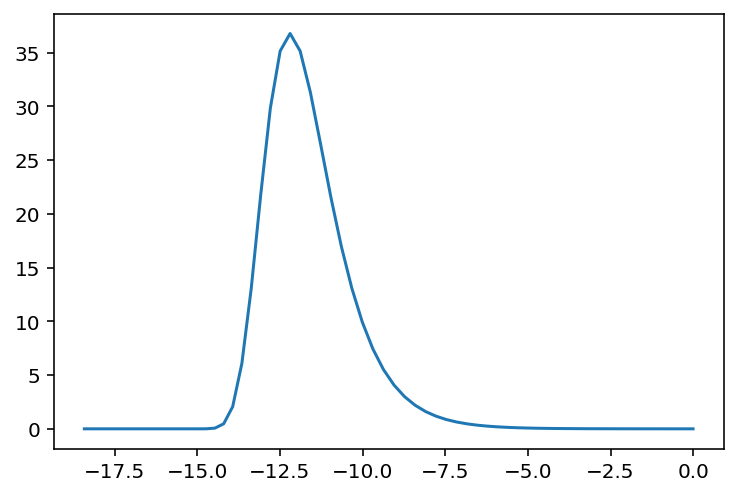

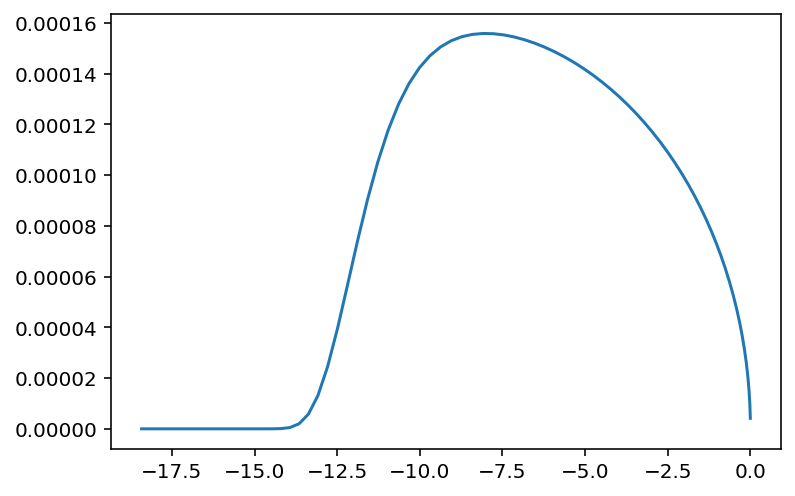

0.005797764274514464 0.0057977642745144775 1.3877787807814457e-17


In [21]:
A = np.log(1e-8)
B = 0
N = 90
p, w = inla.gauss_rule(N, a=A, b=B)
p10 = np.exp(p)
alpha = 0.0005
beta = 0.000005
f = scipy.stats.invgamma.pdf(p10, alpha, scale=beta)
plt.plot(p, f)
plt.show()
exact = scipy.stats.invgamma.cdf(np.exp(B), alpha, scale=beta) - scipy.stats.invgamma.cdf(np.exp(A), alpha, scale=beta)
est = np.sum(f * np.exp(p) * w)
plt.plot(p, f * np.exp(p) * w)
plt.show()
print(exact, est, est - exact)

In [15]:
p, w = inla.gauss_rule(3000, a=np.exp(A), b=np.exp(B))
f = scipy.stats.invgamma.pdf(p, alpha, scale=beta)
exact = scipy.stats.invgamma.cdf(np.exp(B), alpha, scale=beta) - scipy.stats.invgamma.cdf(np.exp(A), alpha, scale=beta)
est = np.sum(f * w)
est, exact, est - exact

(0.005797666149203566, 0.005797764274514464, -9.81253108975344e-08)